In [196]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [197]:
df=pd.read_csv("/Users/sandinatatu/Downloads/Archive/AAPL_quarterly_financials.csv")

In [198]:
df.index = df.name

In [199]:
df = pd.DataFrame(df.loc["BasicEPS",:]).iloc[2:,:]

In [200]:
df.index = pd.to_datetime(df.index)

In [201]:
df = df.sort_index().fillna(0.)

In [202]:
y = df.tail(79)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [203]:
from pytrends.request import TrendReq

In [204]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Tim Cook", "Bill Gates", "Microsoft", "Semiconductors","Taxes","Cupertino", "Weather", "Dictionary", "Pacific Standard Time"]  # Add your keywords here
start_date = '2003-09-30'
end_date = '2023-09-30'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [205]:
df = df.resample("Q").mean()

# 3.) Normalize all the X data

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
scaler=StandardScaler()

In [208]:
X_scaled_array =scaler.fit_transform(df)

In [209]:
X_scaled = pd.DataFrame(X_scaled_array, columns=df.columns)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [210]:
from sklearn.linear_model import Lasso

In [211]:
lasso = Lasso(alpha=.1)

In [212]:
X_scaled

,Tim Cook,Bill Gates,Microsoft,Semiconductors,Taxes,Cupertino,Weather,Dictionary,Pacific Standard Time
0,-1.078090,1.549500,2.425043,3.858380,1.603503,2.045967,-1.275801,2.099280,1.775947
1,-1.078090,0.778815,2.526434,3.479486,0.303359,2.018465,-1.258463,1.832415,0.834337
2,-0.930929,0.307840,2.070174,2.820540,-0.783329,2.018465,-1.050402,1.792386,-0.283824
3,-0.967719,0.564735,2.002580,2.705224,-0.589277,1.715939,-1.397170,2.192683,2.541004
4,-0.967719,1.378236,2.053276,2.359278,1.564692,1.468417,-1.102417,1.952504,2.187901
...,...,...,...,...,...,...,...,...,...
74,0.283144,-0.805371,-0.903963,-0.474191,-0.511657,-1.144307,2.001162,-0.996351,-1.313709
75,0.798205,-1.105082,-0.903963,-0.457717,-0.337011,-1.446833,1.030210,-0.983008,-0.990031
76,0.283144,-0.805371,-0.751877,-0.375349,2.224467,-1.226814,1.515686,-0.983008,-0.754628
77,1.092526,-1.019450,-0.802572,-0.523612,0.749677,-1.391829,1.914470,-1.036381,-1.607962


In [213]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [214]:
coefficients=lasso.coef_

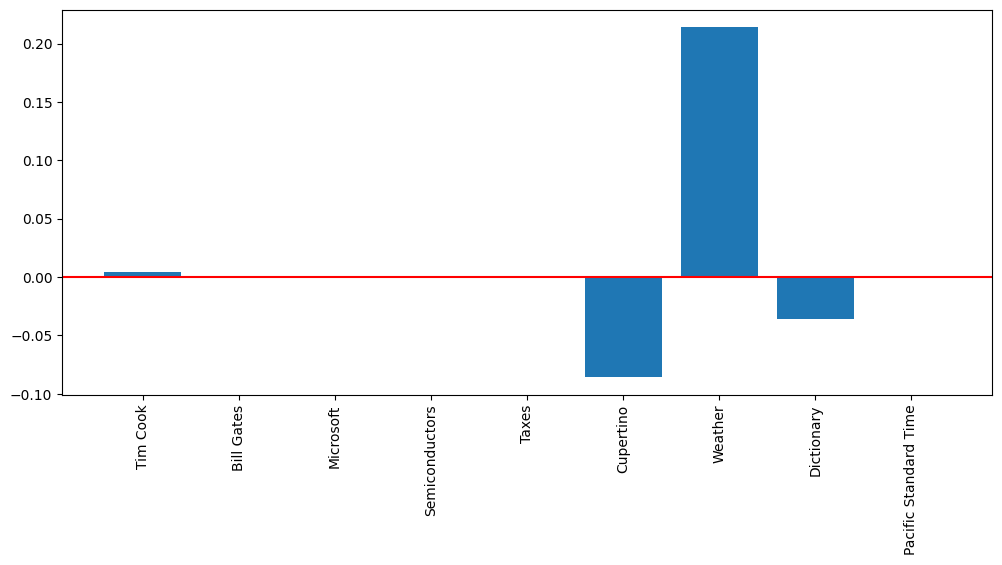

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X_scaled.columns, rotation='vertical')  # Add column names as x-tick labels
plt.axhline(0, color="red")
plt.show()


# 5.) Do these coefficient magnitudes make sense?

Some of the coefficient do indeed make sense. Tim Cook searcher are pozitively correlated with Apple's EPS, signaling that more interest in the CEO may lead to more interest in Apple's producst and thus to higher EPS. Weather is also very highly correlated with Apple's EPS, signaling that nicer weather may lead in more interest for Apple products.